In [ ]:
dataset - titanic dataset
objective - 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = sns.load_dataset('titanic')

In [4]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
data.shape

(891, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [11]:
# Data Cleaning
# handling missing values
data = data.drop(columns = ['deck'])

In [13]:
# fill numerical values age using median()
data['age'] = data['age'].fillna(data['age'].median())

In [17]:
# filling categorical missing values using mode
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data['embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])

In [18]:
# rechecking missing values finally
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [19]:
# Removing duplicates
data.duplicated().sum()

np.int64(116)

In [20]:
data = data.drop_duplicates()

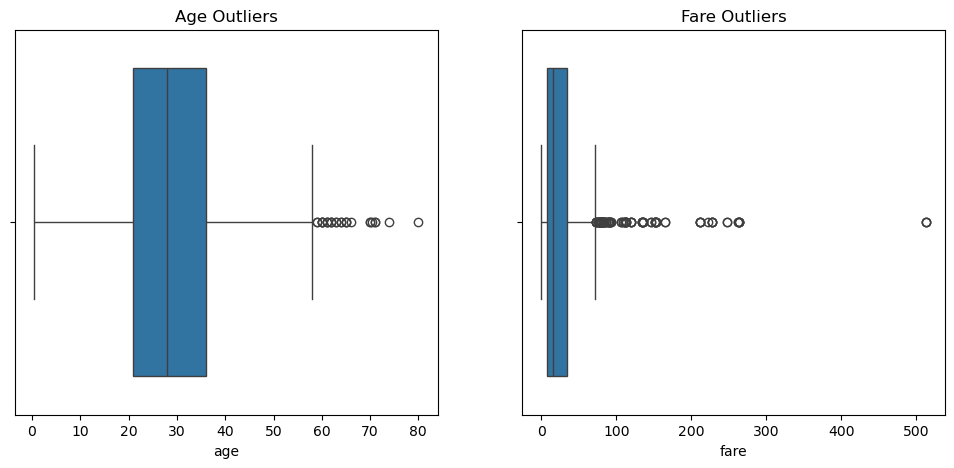

In [21]:
# detecting outliers and fixing if any
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.boxplot(x=data['age'])
plt.title("Age Outliers")
plt.subplot(1, 2, 2)
sns.boxplot(x=data['fare'])
plt.title("Fare Outliers")
plt.show()

In [22]:
# Final clean dataset check
print("Missing values :\n", data.isnull().sum())
print("\n Duplicates: ", data.duplicated().sum())
data.describe(include='all')

Missing values :
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

 Duplicates:  0


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
count,775.000000,775.000000,775,775.000000,775.000000,775.000000,775.000000,775,775,775,775,775,775,775
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,Southampton,no,True
freq,NaN,NaN,483,NaN,NaN,NaN,NaN,562,401,443,443,562,455,437
mean,0.412903,2.246452,NaN,29.581187,0.529032,0.420645,34.878403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.492674,0.853574,NaN,13.766359,0.990326,0.840565,52.408474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,21.000000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,15.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,1.000000,34.197900,NaN,NaN,NaN,NaN,NaN,NaN,NaN


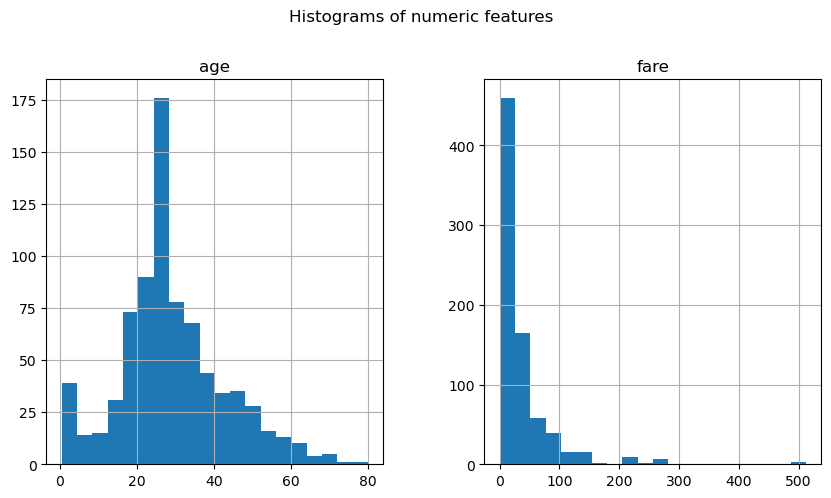

In [23]:
# EDA
# Histograms show the distribution b/w continuous columns like age, fare etc.,
data[['age','fare']].hist(figsize=(10, 5), bins=20)
plt.suptitle("Histograms of numeric features", y=1.02)
plt.show()